In [1]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
import numpy as np

X, y = fetch_openml('monks-problems-1', return_X_y=True)
y = y.astype(np.float32)

Xtrain = OneHotEncoder(sparse=False).fit_transform(X[:124,:])
Xtest = OneHotEncoder(sparse=False).fit_transform(X[124:,:])
ytrain, ytest = y[:124], y[124:]

In [46]:
import numpy as np

from neuralnet.network import Sequential
from neuralnet.layers import LayerDense
from neuralnet.activations import tanh, sigmoid
from neuralnet.losses import mse
from neuralnet.optimizers import GD

# network
net = Sequential()
net.add(LayerDense(17, 5,sigmoid))
net.add(LayerDense(5, 1,tanh))
optim = GD(net.layers, lr=0.01)
# train
net.use(mse)
net.fit(Xtrain, ytrain, epochs=500, optimizer=optim)

# test
out = net.predict(Xtrain)

epoch 500/500   error=0.04    accuracy=0.96: 100%|██████████| 500/500 [00:05<00:00, 91.57it/s]


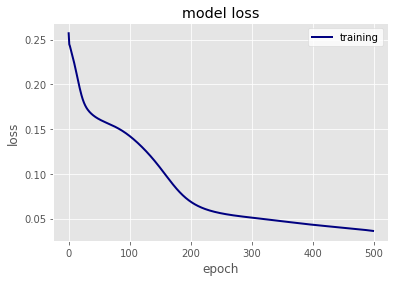

In [47]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, loss = plt.subplots()
loss.plot(net.train_loss_history, color='navy', lw=2)
loss.set_title('model loss')
loss.set_xlabel('epoch')
loss.set_ylabel('loss')
loss.legend(['training', 'validation']).get_frame().set_facecolor('white')
plt.show()

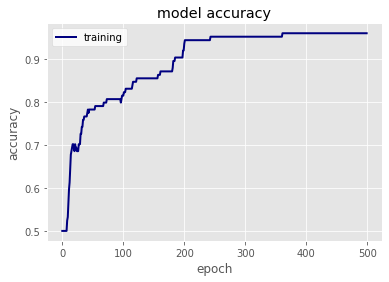

In [48]:
plt.style.use('ggplot')

fig, loss = plt.subplots()
loss.plot(net.val_accuracy_history, color='navy', lw=2)
loss.set_title('model accuracy')
loss.set_xlabel('epoch')
loss.set_ylabel('accuracy')
loss.legend(['training', 'validation']).get_frame().set_facecolor('white')
plt.show()

[[ 1.60625445e+00  5.39346838e-01  3.67051996e-02  2.78898638e+00
   6.15496283e-01]
 [-4.77561977e-01  7.98603995e-01  3.44675175e-02 -6.65208309e-02
  -2.50134116e-01]
 [-9.05318485e-01 -3.81969439e-01 -8.51532966e-03 -2.05880285e+00
  -6.03873925e-01]
 [ 1.33051951e+00  6.06946666e-02  1.99889784e-01  2.39282151e+00
   2.99311436e-01]
 [-1.13984914e+00 -6.16580281e-01 -2.48770083e-01 -2.22987672e+00
  -5.41856061e-01]
 [-9.21576264e-01  6.75237509e-01  8.75564526e-02 -2.83441492e-01
   1.06391961e-01]
 [-5.58468604e-01  6.49364471e-02 -1.89206970e-01  1.89150438e-01
  -4.39675334e-01]
 [-7.23215624e-01  2.38474578e-01 -2.96203233e-02  4.51194533e-01
   5.39928942e-01]
 [ 4.20552196e-03 -1.29387386e-01 -5.59014251e-01 -3.53518441e-01
  -1.22978126e-01]
 [ 2.87037831e-03  1.04210618e-01 -2.80540043e-01 -1.21900859e-01
  -4.70501474e-02]
 [-6.45629087e-03  3.82116466e-01 -2.34894663e-01 -5.98689082e-02
  -2.62549019e-01]
 [ 1.25624246e+00  5.94513286e-01  2.43741723e-01 -1.34204960e+00

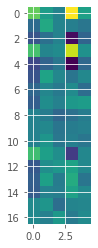

In [54]:
print(net.layers[0].weights)
plt.imshow(net.layers[0].weights)

In [55]:
import tensorflow as tf
from tensorflow import keras

In [67]:
model = keras.Sequential([
    keras.layers.Dense(units=5, activation='sigmoid', input_shape=(17,)),
    keras.layers.Dense(units=1, activation='tanh')
])

In [76]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0, ), 
              loss=tf.losses.mean_squared_error,
              metrics=['accuracy'])

In [77]:
history = model.fit(
    Xtrain ,ytrain, epochs=500
)

Epoch 1/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1942 - accuracy: 0.7177
Epoch 2/500
4/4 [==============================] - 0s 690us/step - loss: 0.1932 - accuracy: 0.7177
Epoch 3/500
4/4 [==============================] - 0s 962us/step - loss: 0.1926 - accuracy: 0.7258
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 0.1921 - accuracy: 0.7258
Epoch 5/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1914 - accuracy: 0.7258
Epoch 6/500
4/4 [==============================] - 0s 643us/step - loss: 0.1909 - accuracy: 0.7177
Epoch 7/500
4/4 [==============================] - 0s 2ms/step - loss: 0.1904 - accuracy: 0.7177
Epoch 8/500
4/4 [==============================] - 0s 776us/step - loss: 0.1899 - accuracy: 0.7177
Epoch 9/500
4/4 [==============================] - 0s 867us/step - loss: 0.1893 - accuracy: 0.7177
Epoch 10/500
4/4 [==============================] - 0s 813us/step - loss: 0.1889 - accuracy: 0.7177
Epoch 11/500
4/4 

4/4 [==============================] - 0s 861us/step - loss: 0.1673 - accuracy: 0.7661
Epoch 84/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1670 - accuracy: 0.7661
Epoch 85/500
4/4 [==============================] - 0s 886us/step - loss: 0.1670 - accuracy: 0.7661
Epoch 86/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1667 - accuracy: 0.7742
Epoch 87/500
4/4 [==============================] - 0s 836us/step - loss: 0.1665 - accuracy: 0.7742
Epoch 88/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1663 - accuracy: 0.7742
Epoch 89/500
4/4 [==============================] - 0s 777us/step - loss: 0.1661 - accuracy: 0.7742
Epoch 90/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1660 - accuracy: 0.7742
Epoch 91/500
4/4 [==============================] - 0s 701us/step - loss: 0.1659 - accuracy: 0.7742
Epoch 92/500
4/4 [==============================] - 0s 987us/step - loss: 0.1658 - accuracy: 0.7742
Epoch 93/500
4/4 [===

4/4 [==============================] - 0s 1ms/step - loss: 0.1575 - accuracy: 0.7742
Epoch 165/500
4/4 [==============================] - 0s 732us/step - loss: 0.1574 - accuracy: 0.7742
Epoch 166/500
4/4 [==============================] - 0s 887us/step - loss: 0.1573 - accuracy: 0.7823
Epoch 167/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1573 - accuracy: 0.7823
Epoch 168/500
4/4 [==============================] - 0s 803us/step - loss: 0.1572 - accuracy: 0.7823
Epoch 169/500
4/4 [==============================] - 0s 889us/step - loss: 0.1572 - accuracy: 0.7823
Epoch 170/500
4/4 [==============================] - 0s 953us/step - loss: 0.1571 - accuracy: 0.7903
Epoch 171/500
4/4 [==============================] - 0s 925us/step - loss: 0.1570 - accuracy: 0.7903
Epoch 172/500
4/4 [==============================] - 0s 843us/step - loss: 0.1568 - accuracy: 0.7823
Epoch 173/500
4/4 [==============================] - 0s 745us/step - loss: 0.1568 - accuracy: 0.7742
Epoch 17

4/4 [==============================] - 0s 815us/step - loss: 0.1523 - accuracy: 0.8145
Epoch 246/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1522 - accuracy: 0.8145
Epoch 247/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1522 - accuracy: 0.8145
Epoch 248/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1520 - accuracy: 0.8145
Epoch 249/500
4/4 [==============================] - 0s 751us/step - loss: 0.1520 - accuracy: 0.8145
Epoch 250/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1520 - accuracy: 0.8145
Epoch 251/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1520 - accuracy: 0.8145
Epoch 252/500
4/4 [==============================] - 0s 2ms/step - loss: 0.1518 - accuracy: 0.8145
Epoch 253/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1518 - accuracy: 0.8145
Epoch 254/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1517 - accuracy: 0.8145
Epoch 255/500
4/4 [=

4/4 [==============================] - 0s 809us/step - loss: 0.1476 - accuracy: 0.8145
Epoch 327/500
4/4 [==============================] - 0s 845us/step - loss: 0.1475 - accuracy: 0.8145
Epoch 328/500
4/4 [==============================] - 0s 762us/step - loss: 0.1475 - accuracy: 0.8145
Epoch 329/500
4/4 [==============================] - 0s 916us/step - loss: 0.1473 - accuracy: 0.8145
Epoch 330/500
4/4 [==============================] - 0s 783us/step - loss: 0.1474 - accuracy: 0.8145
Epoch 331/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1472 - accuracy: 0.8145
Epoch 332/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1473 - accuracy: 0.8145
Epoch 333/500
4/4 [==============================] - 0s 630us/step - loss: 0.1471 - accuracy: 0.8145
Epoch 334/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1471 - accuracy: 0.8145
Epoch 335/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1470 - accuracy: 0.8145
Epoch 336/50

4/4 [==============================] - 0s 930us/step - loss: 0.1417 - accuracy: 0.7984
Epoch 408/500
4/4 [==============================] - 0s 879us/step - loss: 0.1416 - accuracy: 0.8065
Epoch 409/500
4/4 [==============================] - 0s 2ms/step - loss: 0.1415 - accuracy: 0.8065
Epoch 410/500
4/4 [==============================] - 0s 666us/step - loss: 0.1415 - accuracy: 0.8065
Epoch 411/500
4/4 [==============================] - 0s 938us/step - loss: 0.1413 - accuracy: 0.8065
Epoch 412/500
4/4 [==============================] - 0s 980us/step - loss: 0.1413 - accuracy: 0.8065
Epoch 413/500
4/4 [==============================] - 0s 742us/step - loss: 0.1412 - accuracy: 0.8145
Epoch 414/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1412 - accuracy: 0.8065
Epoch 415/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1410 - accuracy: 0.8145
Epoch 416/500
4/4 [==============================] - 0s 754us/step - loss: 0.1409 - accuracy: 0.8065
Epoch 417/

4/4 [==============================] - 0s 730us/step - loss: 0.1338 - accuracy: 0.8145
Epoch 489/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1337 - accuracy: 0.8226
Epoch 490/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1336 - accuracy: 0.8306
Epoch 491/500
4/4 [==============================] - 0s 904us/step - loss: 0.1335 - accuracy: 0.8226
Epoch 492/500
4/4 [==============================] - 0s 703us/step - loss: 0.1337 - accuracy: 0.8065
Epoch 493/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1334 - accuracy: 0.8226
Epoch 494/500
4/4 [==============================] - 0s 706us/step - loss: 0.1331 - accuracy: 0.8145
Epoch 495/500
4/4 [==============================] - 0s 776us/step - loss: 0.1330 - accuracy: 0.8145
Epoch 496/500
4/4 [==============================] - 0s 618us/step - loss: 0.1329 - accuracy: 0.8145
Epoch 497/500
4/4 [==============================] - 0s 938us/step - loss: 0.1328 - accuracy: 0.8145
Epoch 498/

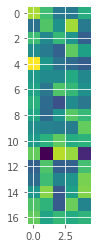

In [78]:
plt.imshow(model.layers[0].get_weights()[0])